In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load the MNIST dataset from Keras

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
print("Training samples: ", len(X_train))
print("Test samples: ", len(X_test))


print("Shape of individual images: ", X_train[0].shape)


Training samples:  60000
Test samples:  10000
Shape of individual images:  (28, 28)


In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

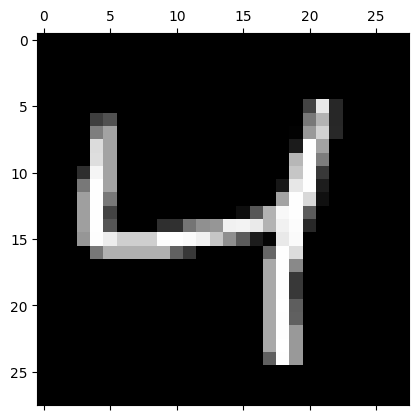

In [14]:
plt.matshow(X_train[2], cmap='gray')

In [15]:
y_train[2]

4

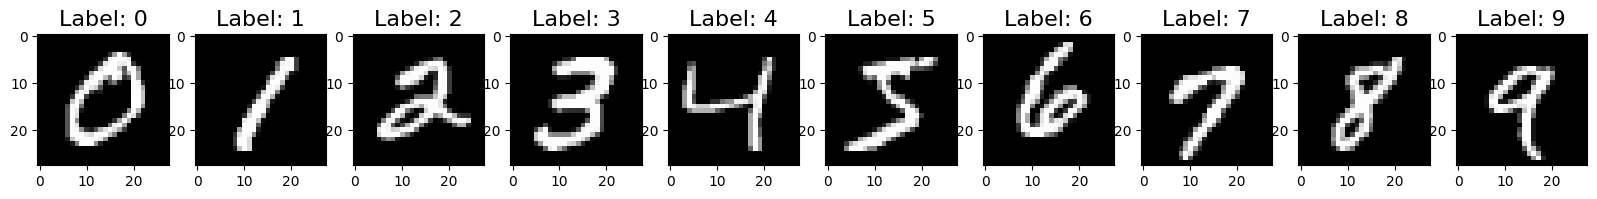

In [16]:
num_classes = 10
_, ax = plt.subplots(1, num_classes, figsize=(20, 20))
for i in range(num_classes):
    sample = X_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'Label: {i}', fontsize=16)

In [17]:
X_train.shape

(60000, 28, 28)

## Scaling Pixel Values

We scale the pixel values to the range [0, 1] for several reasons. Neural networks typically perform better with input data that is on a smaller scale. This helps in speeding up the training process since smaller values make the weight adjustments in the optimization algorithm less extreme. It also helps in preventing the model from getting stuck in local minima during training. Furthermore, scaling ensures that all input features (pixel values in this case) contribute equally to the distance computations in the learning process, thus avoiding bias towards features with larger scales.

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
for r in X_train[2]:
    for c in r:
        if c > 0:
            print(c)

0.2627450980392157
0.9098039215686274
0.15294117647058825
0.24313725490196078
0.3176470588235294
0.47058823529411764
0.7058823529411765
0.15294117647058825
0.49411764705882355
0.6392156862745098
0.00784313725490196
0.6
0.8235294117647058
0.1568627450980392
0.8627450980392157
0.6392156862745098
0.10588235294117647
0.996078431372549
0.6352941176470588
0.8705882352941177
0.6392156862745098
0.7176470588235294
0.996078431372549
0.49019607843137253
0.1803921568627451
0.9607843137254902
0.6392156862745098
0.7764705882352941
0.996078431372549
0.2196078431372549
0.47058823529411764
0.996078431372549
0.6392156862745098
0.09019607843137255
0.9058823529411765
0.996078431372549
0.11372549019607843
0.6235294117647059
0.996078431372549
0.47058823529411764
0.6392156862745098
0.996078431372549
0.8470588235294118
0.06274509803921569
0.6235294117647059
0.996078431372549
0.2627450980392157
0.054901960784313725
0.33725490196078434
0.6980392156862745
0.9725490196078431
0.996078431372549
0.3568627450980392
0

## Flattening Images to 1D Arrays

In many machine learning models, including simple neural networks, the input data needs to be a flat vector of features. By converting the 2D image matrices into 1D arrays, we transform the data into a format that the neural network can work with. This is because the underlying algorithms typically expect a single list of features for each input sample, and each pixel value in the image is treated as a separate feature. This step is essential for the model to process the input image data correctly.

In [20]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [21]:
print(X_train.shape) # 28 * 28
print(X_train_flattened.shape)

(60000, 28, 28)
(60000, 784)


## Create an initial Neural Network using Keras

We will initially use a simple network that only has an input layer and an output layer. The input layer will have 784 neurons (28X28 pixels in each image) and the outputlayer will have 10 neurons as we want to predict a digit, 0-9

In [22]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape = (784,), activation='softmax')
    ]
)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs = 5)



Epoch 1/5


1875/1875 [==============================] - 6s 2ms/step - loss: 0.4631 - accuracy: 0.8794
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9143
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2840 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9257


In [24]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [25]:
y_predicted[1]

array([9.1836409e-04, 2.3675243e-06, 9.8880494e-01, 3.6991900e-04,
       4.7757132e-13, 4.1187061e-03, 5.6381039e-03, 4.0609433e-16,
       1.4755929e-04, 1.3332242e-12], dtype=float32)

In [26]:
np.argmax(y_predicted[1])

2

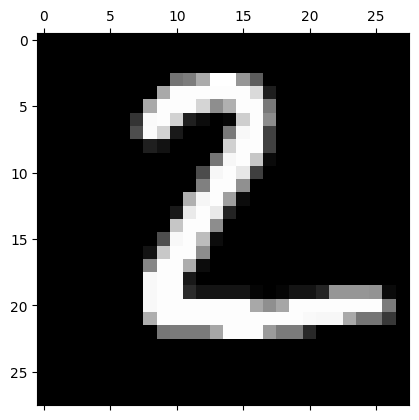

In [27]:
plt.matshow(X_test[1], cmap='grey')

In [28]:
y_test[1]

2

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [30]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Check against the first 10 labels

In [34]:
print(y_predicted_labels[:10])
print(', '.join([str(c) for c in y_test[:10]]))

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
7, 2, 1, 0, 4, 1, 4, 9, 5, 9


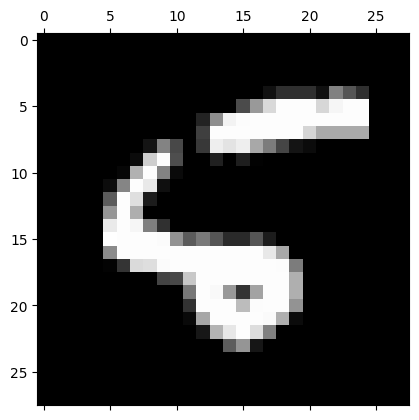

In [35]:
plt.matshow(X_test[8], cmap='gray')

Create a confusion matrix to see how well the model performed.

In [37]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [38]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    6,    2,    2,    1],
       [   0, 1109,    3,    2,    1,    1,    4,    2,   13,    0],
       [   6,    6,  930,   15,    8,    3,   11,    9,   40,    4],
       [   4,    0,   19,  924,    1,   22,    2,   10,   20,    8],
       [   1,    1,    2,    1,  914,    0,   13,    4,   10,   36],
       [  10,    3,    3,   33,   10,  770,   16,    6,   35,    6],
       [   9,    3,    7,    1,    8,    9,  916,    2,    3,    0],
       [   1,    5,   20,   10,    8,    0,    0,  947,    3,   34],
       [   7,    6,    7,   23,    9,   23,   10,   11,  871,    7],
       [  10,    5,    2,   11,   25,    5,    0,   22,    8,  921]])>

Text(95.72222222222221, 0.5, 'Truth')

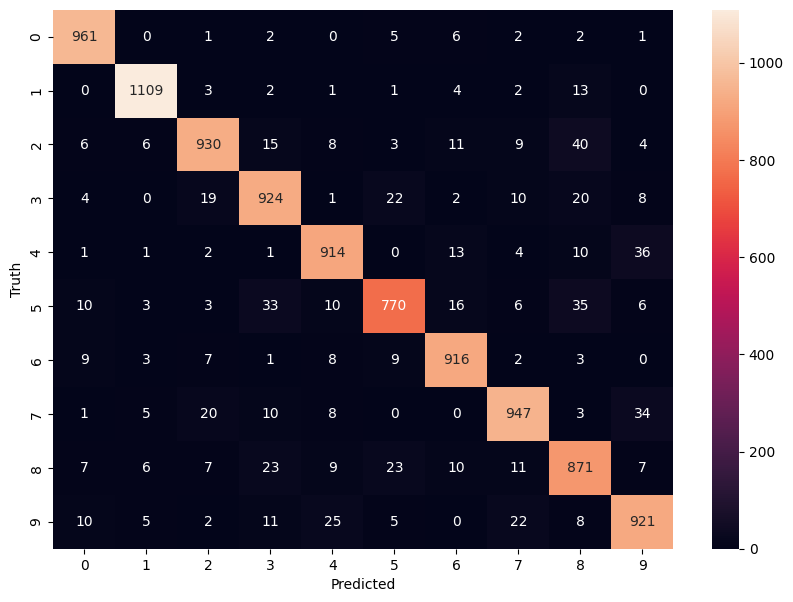

In [39]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
errors = (y_predicted_labels - y_test != 0)
errors

array([False, False, False, ..., False, False, False])

In [41]:
y_error_indexes = [i for i, error in enumerate(errors) if error]
len(y_error_indexes)

737

# Check a few random predictions

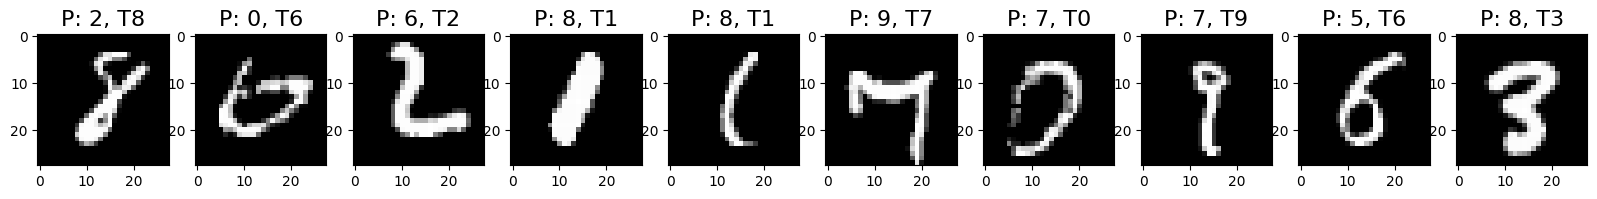

In [42]:
import random

idx_to_check = [y_error_indexes[random.randint(0, len(y_error_indexes) - 1)] for _ in range(10)]

num_classes = 10

_, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i, idx in enumerate(idx_to_check):
    sample = X_test[idx]
    predicted_value = y_predicted_labels[idx]
    true_value = y_test[idx]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'P: {predicted_value}, T{true_value}', fontsize=16)